<a href="https://colab.research.google.com/github/donghuna/AI-Bigdata-intensive/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 준비 및 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn import metrics
from collections import Counter

import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
dataset = pd.read_csv("bank_marketing.csv")
display(dataset)

FileNotFoundError: ignored

In [ ]:
# 2. 데이터 확인
# Bank marketing 데이터의 일반적인 정보를 확인해봅니다.

In [ ]:
dataset.info()

In [ ]:
dataset.columns.values

NameError: ignored

In [ ]:
display(dataset.describe(include='all'))

NameError: ignored

In [ ]:
# 최종적으로 y(subscribed) 정보를 추정해야 되므로, subscribed 정보로 group을 하고 데이터를 확인해 봅니다.

In [ ]:
dataset.groupby('y').mean()

NameError: ignored

In [ ]:
#subcribed 데이터가 매우 불균형하게 있음을 확인

In [ ]:
dataset['y'].value_counts()

NameError: ignored

In [ ]:
sns.countplot(dataset, x='y')

NameError: ignored

In [ ]:
print('yes 비율 : {:.2f}%'.format(len(dataset[dataset.y == 'yes']) / len(dataset) * 100))
print('no 비율 : {:.2f}%'.format(len(dataset[dataset.y == 'no']) / len(dataset) * 100))

In [ ]:
# 결측치가 있는지 확인해 봅니다.

In [ ]:
# null 값 확인
dataset.isna().any()

In [ ]:
# Numberic 데이터의 상관관계를 heatmap으로 확인해봅니다.

In [ ]:
sns.set(style="white")
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, cmap='autumn', center=0, square=True, linewidths=.5)

In [ ]:
# 3. EDA (Exploratory Data Analysis)

In [ ]:
# 3.1 Age

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Age - subscribed')
sns.histplot(dataset, x='age', hue='y', multiple='dodge')
plt.xlabel('Age')
plt.ylabel('y')
plt.show()

In [ ]:
# Age의 전체 그래프를 보면, 60세를 전후로 데이터가 큰 차이가 있음을 알 수 있다.
# 30세 and 45세 정도에서도 차이가 있기에 분류가 가능하지만, 큰 차이를 보이는 60세 전후로만 데이터를 나누어 확인.

NameError: ignored

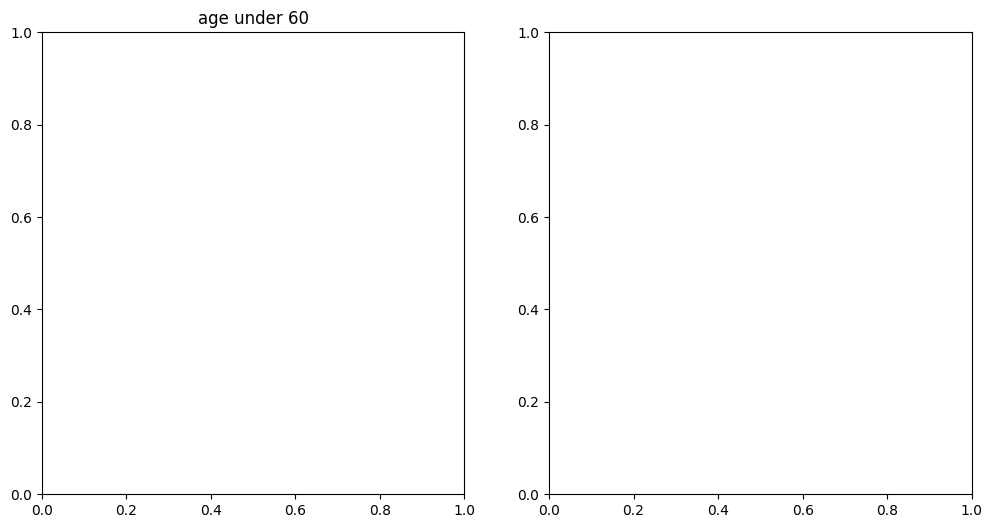

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title("age under 60")
temp_data = dataset[dataset['age'] <= 60]
sns.histplot(temp_data, x='age', hue='y', multiple='dodge', ax=ax[0], bins=30)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('y')

ax[0].set_title("age over 60")
temp_data = dataset[dataset['age'] > 60]
sns.histplot(temp_data, x='age', hue='y', multiple='dodge', ax=ax[1], bins=30)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('y')

plt.show()

In [ ]:
print('age 60 이하 중에서 subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.age <= 60) & (dataset.y == 'yes')]) / len(dataset[dataset.age <= 60]) * 100))
print('age 60 초과 중에서 subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.age > 60) & (dataset.y == 'yes')]) / len(dataset[dataset.age > 60]) * 100))


In [ ]:
# 3.2 Job

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Job - subscribed')
sns.histplot(dataset, x='job', hue='y', multiple='dodge')
plt.xlabel('job')
plt.ylabel('y')
plt.xticks(rotation=25)
plt.show()

In [ ]:
#Unknown 데이터가 존재하지만 이를 결측치라고 판단하지는 않았습니다.
# 또한 그 비율이 매우 낮다는것을 확인했습니다.

# 직업별로 Subscribed 비율이 조금씩 차이가 있음을 확인하였습니다. 

In [ ]:
dataset.groupby(['job, 'y'])['y'].count() / dataset.groupby(['job'])['job'].count() * 100

SyntaxError: ignored

In [ ]:
# 3.3 Marital

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('Marital - subscribed')
sns.countplot(dataset, x='marital', hue='y')
plt.xlabel('Marital')
plt.ylabel('y')
plt.show()

Single인 경우에는 Subscribed 비율이 조금 높음을 확인

3.4 Education

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('Education - subscribed')
sns.countplot(dataset, x='education', hue='y')
plt.xlabel('Education')
plt.ylabel('y')
plt.show()

교육 수준에 따라 유의미한 차이가 있음을 확인하였습니다.
여기서도 unknown 데이터가 존재하는데, 이를 결측치로 가정하고 상관관계가 있는 다른 변수들로 예측하는 시도를 해보았습니다.

In [ ]:
print('Primary subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.education == 'primary') & (dataset.y == 'yes')]) / len(dataset[dataset.education == 'primary']) * 100))
print('Secondary subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.education == 'secondary') & (dataset.y == 'yes')]) / len(dataset[dataset.education == 'secondary']) * 100))
print('Tertiary subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.education == 'tertiary') & (dataset.y == 'yes')]) / len(dataset[dataset.education == 'tertiary']) * 100))
print('Unknown subscribed 비율 : {:.2f}%'.format(len(dataset[(dataset.education == 'unknown') & (dataset.y == 'yes')]) / len(dataset[dataset.education == 'unknown']) * 100))

3.5 Default

In [ ]:
dataset.groupby(['default', 'y'])['y'].count() / dataset.groupby(['default'])['default'].count() * 100

Default 상태이면 subscribed 비율이 많이 내려가지만, 전체 데이터에서의 Default 비중이 매우 적다.

3.6 Balance

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Balance')
sns.distplot(dataset.balance, bins=20)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.xticks(rotation=20)
plt.show()

Balance 데이터는 마이너스인 데이터와 플러스 데이터에서 Subscribed 결과가 많이 다름을 확인하였습니다.  
좀 더 세부적으로 4단계로 분류를 해보았습니다.

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].set_title("~ -1000")
temp_data = dataset[dataset.balance < -1000]
sns.histplot(temp_data, x='balance', hue='y', multiple='dodge', ax=ax[0][0], bins=30)
ax[0][0].set_xlabel('Balance')
ax[0][0].set_ylabel('y')

ax[0][1].set_title("-1000 ~ 0")
temp_data = dataset[(dataset.balance >= -1000) & (dataset.balance < 0)]
sns.histplot(temp_data, x='balance', hue='y', multiple='dodge', ax=ax[0][1], bins=30)
ax[0][1].set_xlabel('Balance')
ax[0][1].set_ylabel('y')

ax[1][0].set_title("~ -1000")
temp_data = dataset[(dataset.balance >= 10000) & (dataset.balance < 20000)]
sns.histplot(temp_data, x='balance', hue='y', multiple='dodge', ax=ax[1][0], bins=30)
ax[1][0].set_xlabel('Balance')
ax[1][0].set_ylabel('y')

ax[1][1].set_title("-1000 ~ 0")
temp_data = dataset[dataset.balance >= 20000]
sns.histplot(temp_data, x='balance', hue='y', multiple='dodge', ax=ax[1][1], bins=30)
ax[1][1].set_xlabel('Balance')
ax[1][1].set_ylabel('y')

plt.show()

3.7 Housing, Loan

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title("Housing")
ax[0] = sns.histplot(temp_data, x='housing', hue='y', stat='percent', multiple='dodge', ax=ax[0], bins=30)
for c in ax[0].containers:
    labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax[0].bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2)
ax[0].set_xlabel('Housing')
ax[0].set_ylabel('y')

ax[1].set_title("Loan")
temp_data = dataset[(dataset.balance >= -1000) & (dataset.balance < 0)]
ax[1] = sns.histplot(temp_data, x='loan', hue='y', stat='percent', multiple='dodge', ax=ax[1], bins=30)
for c in ax[1].containers:
    labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax[1].bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2)
ax[0].set_xlabel('Loan')
ax[0].set_ylabel('y')

plt.show()

Housing 및 Loan이 있는 상황이면 자금의 여유가 없어서인지 Subscribed 비율이 매우 낮았다.

3.8 Contact

In [ ]:
dataset.groupby(['contact', 'y'])['y'].count() / dataset.groupby(['contact'])['contact'].count() * 100

Unknown에서 Subscribed 비율이 매우 낮습니다.

3.9 Day

처음에는 Subscribed 개수가 모두 비슷해서 preprocessing과정에서 ㅔ거했던 열입니다.  
다시 검토해보니 Subscribed수는 비슷하지만, 비율이 날짜마다 크게 달라서 값을 사용하였습니다.

In [ ]:
sns.histplot(dataset, x='day', multiple='dodge', hue='y', bins=31)
plt.xticks(rotation=20)

3.10 Month

달마다 Subscribed 비율이 각기 달라서 유의미한 결과를 얻을 수 있을것같습니다.

In [ ]:
sns.displot(dataset, x='month', multiple='dodge', hue='y', bins=12)
plt.xticks(rotation=20)

3.11 Duration

통기시간에 관한 열입니다.  
자세히보면 시간이 매우 짧을 경우에는 Subscribed하지 않지만, 시간에 따라 달라짐을 확인 할 수 있습니다.

In [ ]:
sns.histplot(dataset, x='duration', hue='y', bins=50)
plt.xticks(rotation=20)

Duration 데이터를 3개 범주로 분류 해보면, 통화시간에 따라 Subscribed 데이터가 확연히 다름을 알 수 있습니다.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Duration <= 70")
temp_data = dataset[dataset.duration <= 70]
sns.histplot(temp_data, x='duration', hue='y', ax=ax[0], bins=30)
ax[0].set_xlabel('Duration')
ax[0].set_ylabel('y')

ax[1].set_title("70 < Duration <= 700")
temp_data = dataset[(dataset.duration > 70) & (dataset.duration <=700)]
sns.histplot(temp_data, x='duration', hue='y', ax=ax[1], bins=30)
ax[1].set_xlabel('Duration')
ax[1].set_ylabel('y')

ax[2].set_title("Duration > 700")
temp_data = dataset[dataset.duration > 700]
sns.histplot(temp_data, x='duration', hue='y', ax=ax[2], bins=30)
ax[2].set_xlabel('Duration')
ax[3].set_ylabel('y')

plt.show()

3.12 Campaign

In [ ]:
display(dataset['campaign'].unique())
sns.histplot(dataset, x='campaign', hue='y', multiple='dodge', bins=30)

3.13 Pdays

number of days that passed by after the client was last contacted from a previous campaign (numberic, -1 means client was not previously contacted)  
값 -1은 이전에 기록이 없는 고객이기 때문에, 이를 따로 구분해야겠다고 생각을 했습니다.  
실제로 값이 -1인 고객은 Subscribed 결과가 안좋습니다.

In [ ]:
sns.histplot(dataset, x='duration', hue='y', bins=50)
plt.xticks(rotation=20)

Pdays도 구간별로 유의미한 Subscribed 차이가 확연히 있다고 생각하여, 이를 분류하기로 했습니다.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("0 <= Pdays < 200")
temp_data = dataset[(dataset.pdays >= 0) & (dataset.pdays < 200)]
sns.histplot(temp_data, x='pdays', hue='y', multiple='dodge', ax=ax[0], bins=20)
ax[0].set_xlabel('Pdays')
ax[0].set_ylabel('y')

ax[1].set_title("200 <= Pdays < 375")
temp_data = dataset[(dataset.pdays >= 200) & (dataset.pdays < 375)]
sns.histplot(temp_data, x='pdays', hue='y', multiple='dodge', ax=ax[1], bins=20)
ax[1].set_xlabel('Pdays')
ax[1].set_ylabel('y')

ax[2].set_title("375 <= Pdays")
temp_data = dataset[dataset.pdays >= 375]
sns.histplot(temp_data, x='pdays', hue='y', multiple='dodge', ax=ax[2], bins=20)
ax[2].set_xlabel('Pdays')
ax[2].set_ylabel('y')

plt.show()

3.14 Previous

Previous는 outlier가 존재함을 확인하였습니다.

In [ ]:
sns.boxplot(dataset, x='previous', hue='y')
plt.xticks(rotations=20)

분별력이 크지는 않아보이지만, 구간별로 결과 차이가 있어보여서 나누어보았습니다.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("0 <= Previous < 5")
temp_data = dataset[(dataset.previous >= 0) & (dataset.previous < 5)]
sns.histplot(temp_data, x='previous', hue='y', multiple='dodge', ax=ax[0], bins=20)
ax[0].set_xlabel('Previous')
ax[0].set_ylabel('y')

ax[1].set_title("5 <= Previous < 20")
temp_data = dataset[(dataset.previous >= 5) & (dataset.previous < 20)]
sns.histplot(temp_data, x='previous', hue='y', multiple='dodge', ax=ax[1], bins=20)
ax[1].set_xlabel('Previous')
ax[1].set_ylabel('y')

ax[2].set_title("20 <= Pdays < 80")
temp_data = dataset[(dataset.previous >= 20) & (dataset.previous < 80)]
sns.histplot(temp_data, x='previous', hue='y', multiple='dodge', ax=ax[2], bins=20)
ax[2].set_xlabel('Previous')
ax[2].set_ylabel('y')

plt.show()

poutcome에는 unknown 데이터가 많은데, poutcome과 previous 데이터의 상관관계가 높아보여 그래프로 확인해보았습니다.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("0 <= Previous < 5")
temp_data = dataset[(dataset.previous >= 0) & (dataset.previous < 5)]
sns.histplot(temp_data, x='previous', hue='poutcome', multiple='dodge', ax=ax[0], bins=20)
ax[0].set_xlabel('Previous')
ax[0].set_ylabel('Poutcome')

ax[1].set_title("5 <= Previous < 20")
temp_data = dataset[(dataset.previous >= 5) & (dataset.previous < 20)]
sns.histplot(temp_data, x='previous', hue='poutcome', multiple='dodge', ax=ax[1], bins=20)
ax[1].set_xlabel('Previous')
ax[1].set_ylabel('Poutcome')

ax[2].set_title("20 <= Pdays < 80")
temp_data = dataset[(dataset.previous >= 20) & (dataset.previous < 80)]
sns.histplot(temp_data, x='previous', hue='poutcome', multiple='dodge', ax=ax[2], bins=20)
ax[2].set_xlabel('Previous')
ax[2].set_ylabel('Poutcome')

plt.show()

3.15 Poutcome

Unknown 데이터가 압도적으로 많음  
Poutcome값이 success인 경우에 Subscribed 비율이 압도적으로 높아서, unknown 데이터를 생성할 수 있다면 성능을 높일 수 있을것 같아 보였습니다.

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(dataset, x='poutcome', hue='y', stat='percent', multiple='dodge')
for c in ax.containers:
    labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2)
plt.xticks(rotation=20)

In [ ]:
ㅇ

In [ ]:
ㅁㄴㅇ